In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
# デバッグ用関数
def debug_print(*args):
    for arg in args:
        print(arg)


# データの読み込み（bo用）
df_bo = pd.read_csv(
    "../bo/data.csv",
    engine="python",
    encoding="utf-8",
)

# データの読み込み（random用）
df_random = pd.read_csv(
    "../random/data.csv",
    engine="python",
    encoding="utf-8",
)

In [3]:
# IDをインデックスに設定
df_bo = df_bo.set_index("ID")
df_random = df_random.set_index("ID")

debug_print(df_bo)
debug_print(df_random)

# 重複行の確認（全データセットに対して）
duplicates_bo = df_bo[df_bo.duplicated(keep=False)]
duplicates_random = df_random[df_random.duplicated(keep=False)]

debug_print(duplicates_bo)
debug_print(duplicates_random)

# 'energy'列にデータがある行のみを抽出
df_with_energy_bo = df_bo.dropna(subset=["energy"])
df_with_energy_random = df_random.dropna(subset=["energy"])

debug_print(df_with_energy_bo)
debug_print(df_with_energy_random)

# 'energy'列にデータがない行のみを抽出
df_without_energy_bo = df_bo[df_bo["energy"].isnull()].drop(
    columns=["energy"]
)
df_without_energy_random = df_random[df_random["energy"].isnull()].drop(
    columns=["energy"]
)

debug_print(df_without_energy_bo)
debug_print(df_without_energy_random)

min_index_bo = df_bo["energy"].idxmin()
min_value_bo = min(df_bo["energy"])
min_index_random = df_random["energy"].idxmin()
min_value_random = min(df_random["energy"])

debug_print(min_index_bo, min_value_bo)
debug_print(min_index_random, min_value_random)

         Ni  Ni_Mg  Cu_Ni  Co_Ni  Zn_Ni  Mg  Cu_Mg  Co_Mg  Zn_Mg  Cu  Co_Cu  \
ID                                                                            
1         5     13     13     18     18   7     15     14     16   5     16   
2         9     11     16     11     16   7     15     17     15   5     18   
3         4     14     14     18     18   6     18     17     11   7     13   
4         5     13     14     16     19   6     16     17     14   4     11   
5         5     20     14     16     12   4     11     17     16   6     17   
...      ..    ...    ...    ...    ...  ..    ...    ...    ...  ..    ...   
999996    5     12     14     16     20   7     18     11     17   3     17   
999997    4     15     14     19     16   5     10     15     22   8     17   
999998    8     14     16     12     14   5     15     18     15   6     13   
999999    5     13     18     17     14   4     13     14     24   7     12   
1000000   6     18     14     18     10   6     12  

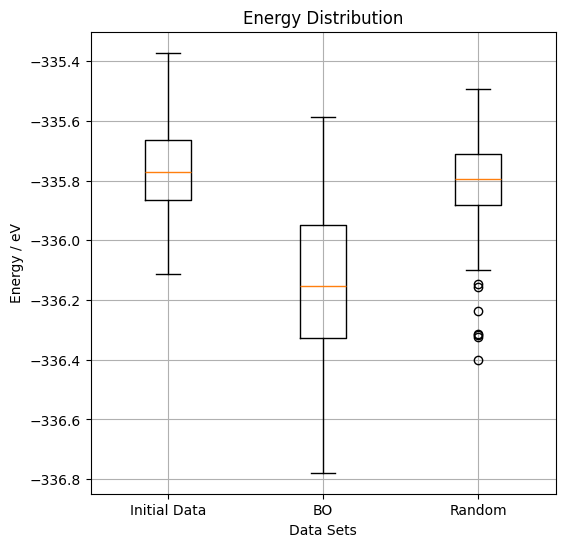

In [4]:
# 指定された行より前のデータを抽出
specified_index = 100
df_initial_bo = df_with_energy_bo.loc[:specified_index]
df_filtered_bo = df_with_energy_bo.loc[
    df_with_energy_bo.index > specified_index
]
df_filtered_random = df_with_energy_random.loc[
    df_with_energy_random.index > specified_index
]

# 箱ひげ図の作成
plt.figure(figsize=(6, 6))

# Initial data
plt.boxplot(
    [
        df_initial_bo["energy"],
        df_filtered_bo["energy"],
        df_filtered_random["energy"],
    ],
    labels=["Initial Data", "BO", "Random"],
)
plt.title("Energy Distribution")
plt.xlabel("Data Sets")
plt.ylabel("Energy / eV")
plt.grid(True)
plt.show()

In [5]:
# ログファイルから"Submitting jobs"のIDを取得（bo用）
log_file_path_bo = "../bo/bo.log"
submitting_jobs_pattern = re.compile(r"Submitting jobs: (\d+) (\d+) (\d+) (\d+)")

iterations_bo = []
with open(log_file_path_bo, "r") as log_file:
    for line in log_file:
        match = submitting_jobs_pattern.search(line)
        if match:
            job_ids = list(map(int, match.groups()))
            iterations_bo.append(job_ids)

# ログファイルから"Submitting jobs"のIDを取得（random用）
log_file_path_random = "../random/random.log"

iterations_random = []
with open(log_file_path_random, "r") as log_file:
    for line in log_file:
        match = submitting_jobs_pattern.search(line)
        if match:
            job_ids = list(map(int, match.groups()))
            iterations_random.append(job_ids)

In [6]:
# エネルギーの取得とイテレーションごとの処理（bo用）
iteration_energies_bo = []
min_energies_bo = []

# 指定された行以前のエネルギーの最小値を取得
initial_min_energy_bo = df_with_energy_bo.loc[
    df_with_energy_bo.index <= specified_index
]["energy"].min()
current_min_energy_bo = initial_min_energy_bo

# イテレーション0回のときの最小エネルギーを追加
min_energies_bo.append(current_min_energy_bo)

for job_ids in iterations_bo:
    energies = df_filtered_bo.loc[
        df_filtered_bo.index.isin(job_ids), "energy"
    ].values
    if len(energies) > 0:  # エネルギーが空でない場合
        iteration_energies_bo.append(energies)
        current_min_energy_bo = min(current_min_energy_bo, min(energies))
    min_energies_bo.append(current_min_energy_bo)

# エネルギーの取得とイテレーションごとの処理（random用）
iteration_energies_random = []
min_energies_random = []

# 指定された行以前のエネルギーの最小値を取得
initial_min_energy_random = df_with_energy_random.loc[
    df_with_energy_random.index <= specified_index
]["energy"].min()
current_min_energy_random = initial_min_energy_random

# イテレーション0回のときの最小エネルギーを追加
min_energies_random.append(current_min_energy_random)

for job_ids in iterations_random:
    energies = df_filtered_random.loc[
        df_filtered_random.index.isin(job_ids), "energy"
    ].values
    if len(energies) > 0:  # エネルギーが空でない場合
        iteration_energies_random.append(energies)
        current_min_energy_random = min(current_min_energy_random, min(energies))
    min_energies_random.append(current_min_energy_random)

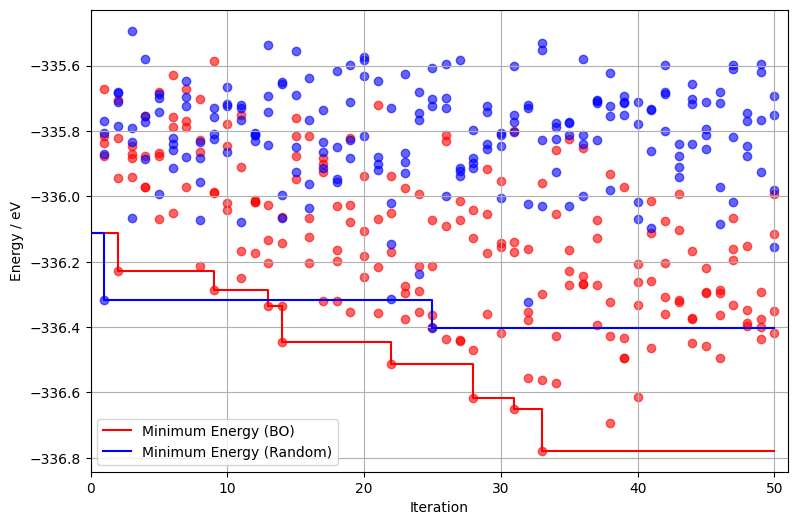

In [7]:
specified_iteration = 50

# グラフの描画（エネルギー変化の比較）
plt.figure(figsize=(9, 6))

# 各イテレーションのエネルギーをプロット（bo）
for i, energies in enumerate(iteration_energies_bo[:specified_iteration]):
    plt.scatter([i + 1] * len(energies), energies, color="red", alpha=0.6)

# 階段状の最小エネルギーをプロット（bo）
plt.step(
    range(len(min_energies_bo)),
    min_energies_bo,
    where="post",
    color="red",
    label="Minimum Energy (BO)",
)

# 各イテレーションのエネルギーをプロット（random）
for i, energies in enumerate(iteration_energies_random[:specified_iteration]):
    plt.scatter([i + 1] * len(energies), energies, color="blue", alpha=0.6)

# 階段状の最小エネルギーをプロット（random）
plt.step(
    range(len(min_energies_random)),
    min_energies_random,
    where="post",
    color="blue",
    label="Minimum Energy (Random)",
)

plt.xlabel("Iteration")
plt.ylabel("Energy / eV")
# plt.title("Energy Distribution and Minimum Energy Over Iterations")
plt.legend()
plt.grid(True)
plt.xlim(left=0, right=specified_iteration+1)
plt.show()

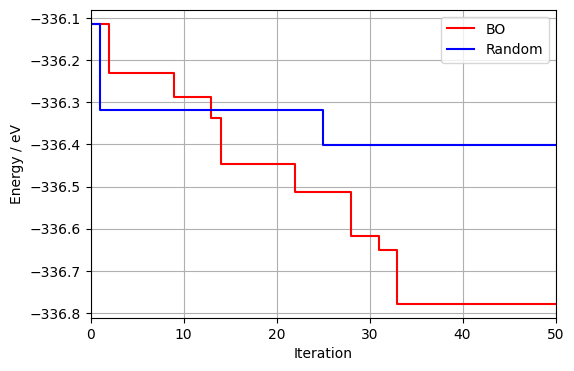

In [8]:
specified_iteration = 50

# グラフの描画（エネルギー変化の比較）
plt.figure(figsize=(6, 4))

# 階段状の最小エネルギーをプロット（bo）
plt.step(
    range(len(min_energies_bo)),
    min_energies_bo,
    where="post",
    color="red",
    label="BO",
)

# 階段状の最小エネルギーをプロット（random）
plt.step(
    range(len(min_energies_random)),
    min_energies_random,
    where="post",
    color="blue",
    label="Random",
)

plt.xlabel("Iteration")
plt.ylabel("Energy / eV")
# plt.title("Minimum Energy Over Iterations")
plt.legend()
plt.grid(True)
plt.xlim(left=0, right=specified_iteration)
plt.show()